In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df=pd.read_csv(r'C:\Users\jibin\Downloads\car_age_price.csv')

In [3]:
df.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
df.shape

(112, 2)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [6]:
x=df.iloc[:, :-1].values
x

array([[2018],
       [2019],
       [2019],
       [2018],
       [2018],
       [2015],
       [2016],
       [2017],
       [2017],
       [2017],
       [2019],
       [2018],
       [2017],
       [2019],
       [2017],
       [2017],
       [2017],
       [2017],
       [2019],
       [2017],
       [2018],
       [2019],
       [2015],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2019],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2017],
       [2018],
       [2020],
       [2019],
       [2019],
       [2018],
       [2019],
       [2019],
       [2018],
       [2019],
       [2018],
       [2016],
       [2018],
       [2013],
       [2018],
       [2013],
       [2013],
       [2017],
       [2017],
       [2014],
       [2017],
       [2014],
       [2016],
       [2015],
       [2017],
       [2017],
       [2017],
       [2015],
       [2017],
       [20

In [7]:
y=df.iloc[:, 1].values
y

array([465000, 755000, 700000, 465000, 465000, 350000, 425000, 575000,
       509999, 575000, 500000, 500000, 500000, 600000, 475000, 500000,
       500000, 550000, 500000, 500000, 500000, 500000, 434999, 550000,
       550000, 550000, 550000, 550000, 550000, 550000, 650000, 550000,
       550000, 550000, 450000, 550000, 550000, 486000, 475000, 545000,
       525000, 600000, 550000, 550000, 550000, 450000, 500000, 450000,
       396000, 600000, 325000, 550000, 345000, 345000, 525000, 550000,
       341000, 550000, 450000, 550000, 490000, 540000, 540000, 595000,
       490000, 495000, 525000, 400000, 465000, 300000, 450000, 490000,
       300000, 320000, 490000, 490000, 450000, 325000, 409999, 400000,
       390000, 390000, 390000, 480000, 325000, 320000, 520000, 520000,
       520000, 520000, 520000, 520000, 520000, 520000, 520000, 520000,
       520000, 640000, 700000, 600000, 350000, 400000, 350000, 375000,
       400000, 400000, 300000, 375000, 300000, 425000, 420000, 425000],
     

## Finding Relationship

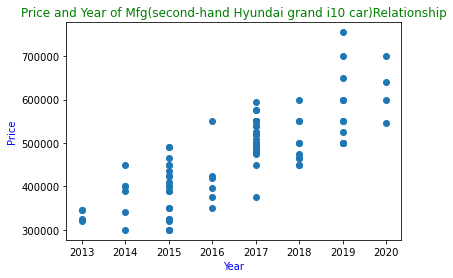

In [8]:
plt.title('Price and Year of Mfg(second-hand Hyundai grand i10 car)Relationship', color="Green")
plt.xlabel('Year',color='blue')
plt.ylabel('Price',color='blue')
plt.scatter(df.Year,df.Price)

## Splitting data for training and testing

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)


## Creating the Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression() 

In [11]:
lr=lr.fit(x_train,y_train)

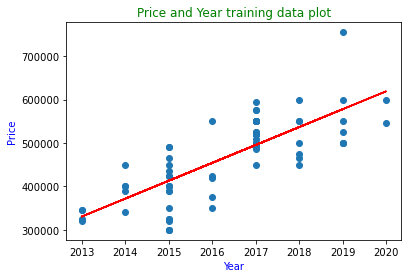

In [12]:
plt.scatter(x_train,y_train)
plt.title('Price and Year training data plot',color='green')
plt.xlabel('Year',color='blue')
plt.ylabel('Price',color='blue')
plt.plot(x_train,lr.predict(x_train),color='red')

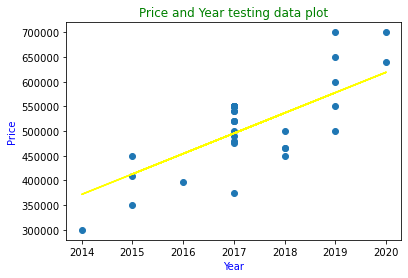

In [13]:
plt.scatter(x_test,y_test)
plt.title('Price and Year testing data plot',color='green')
plt.xlabel('Year',color='blue')
plt.ylabel('Price',color='blue')
plt.plot(x_test,lr.predict(x_test),color='yellow')

## Predicting price(2022)

In [14]:
lr.predict(np.array(2022).reshape(-1,1))

array([701311.43135265])

In [15]:
lr.score(x_test,y_test)

0.5641375460639686

In [16]:
lr.score(x_train,y_train)  # it is clearly understand that data set is overfit as compared to testing data. This can can be address using lasso regression.

0.5864766708943852

## Lasso Regression( L1 Regularisation)

In [17]:
from sklearn import linear_model
lasr=linear_model.Lasso(alpha=50,max_iter=100,tol=0.1)
lasr.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [18]:
lasr.score(x_test,y_test)

0.5640340724071056

In [19]:
lasr.score(x_train,y_train)

0.5864765567528412

In [20]:
lasr.predict(np.array(2022).reshape(-1,1))

array([701209.65171693])

In [21]:
## The conclusion is that a slight difference was addressed by lasso regression. This is because linear regression less prone to over fitting for low dimensional data set.